In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

## Coldest days

Find the coldest days in past 10 years

In [35]:
# Load both datasets
winter_10y_temp = xr.open_dataset("emwcf/jan-feb-2015-2024/instant.nc")  # temperatures

# Convert to DataFrame
winter_10y = winter_10y_temp.to_dataframe().reset_index()

# Convert Kelvin to Celsius
winter_10y['temp'] = winter_10y['t2m'] - 273.15
winter_10y['soil_0_7'] = winter_10y['stl1'] - 273.15

In [36]:
winter_10y = winter_10y.rename(columns={"valid_time": "time"})
winter_10y['month'] = pd.to_datetime(winter_10y['time']).dt.month
winter_10y = winter_10y.set_index('time')

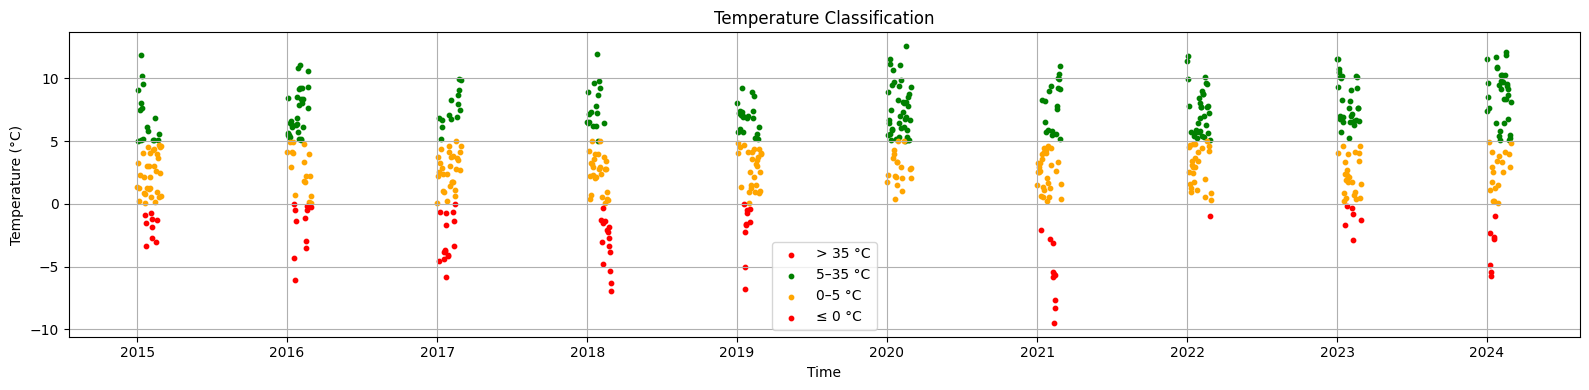

In [37]:
import matplotlib.pyplot as plt

# Define masks for each range
mask_red_hot = winter_10y['temp'] > 35
mask_green = (winter_10y['temp'] > 5) & (winter_10y['temp'] <= 35)
mask_orange = (winter_10y['temp'] > 0) & (winter_10y['temp'] <= 5)
mask_red_cold = winter_10y['temp'] <= 0

plt.figure(figsize=(16, 4))

# Plot each range with corresponding color
plt.scatter(winter_10y.index[mask_red_hot], winter_10y['temp'][mask_red_hot], color='red', label='> 35 °C', s=10)
plt.scatter(winter_10y.index[mask_green], winter_10y['temp'][mask_green], color='green', label='5–35 °C', s=10)
plt.scatter(winter_10y.index[mask_orange], winter_10y['temp'][mask_orange], color='orange', label='0–5 °C', s=10)
plt.scatter(winter_10y.index[mask_red_cold], winter_10y['temp'][mask_red_cold], color='red', label='≤ 0 °C', s=10)

plt.title("Temperature Classification")
plt.ylabel("Temperature (°C)")
plt.xlabel("Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


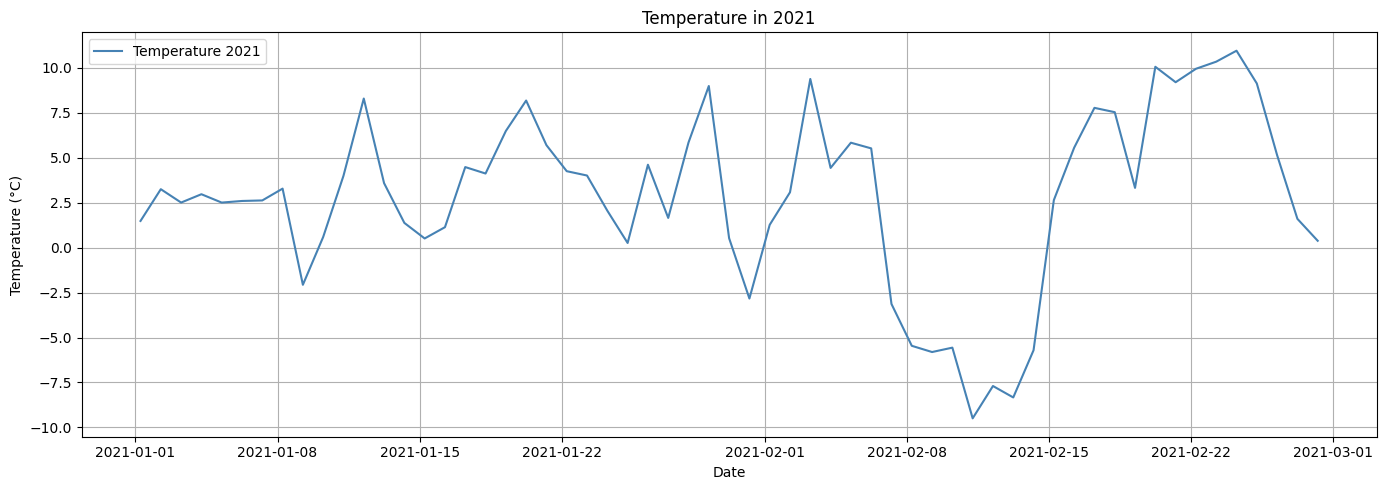

In [38]:
# Filter data for 2021
winter_10y_2021 = winter_10y.loc['2021']

# Plot
plt.figure(figsize=(14, 5))
plt.plot(winter_10y_2021.index, winter_10y_2021['temp'], color='steelblue', label='Temperature 2021')

plt.title("Temperature in 2021")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [51]:
# Ensure the index is datetime (if not already)
winter_10y.index = pd.to_datetime(winter_10y.index)

# Step 1: Group by date and get daily minimum temperature
daily_min_temps = winter_10y['temp'].groupby(winter_10y.index.date).min()

# Step 2: Sort by temperature and select the 20 coldest days
coldest_20_days = daily_min_temps.sort_values().head(10)

# Display the result
print(coldest_20_days)

2021-02-11   -9.495209
2021-02-13   -8.333099
2021-02-12   -7.696869
2018-02-28   -6.925385
2019-01-21   -6.797455
2018-02-27   -6.293060
2016-01-19   -6.059174
2017-01-22   -5.843353
2021-02-09   -5.806732
2024-01-11   -5.763519
Name: temp, dtype: float32


## Plot the coldest months

In [55]:
import xarray as xr

# Load dataset
cold_winters_temp = xr.open_dataset("emwcf/jan-feb-2016-2018-2019-2021/instant.nc")  # temperatures

# Convert to DataFrame
cold_winters = cold_winters_temp.to_dataframe().reset_index()

# Convert Kelvin to Celsius
cold_winters['temp'] = cold_winters['t2m'] - 273.15
cold_winters['soil_0_7'] = cold_winters['stl1'] - 273.15

In [56]:
cold_winters = cold_winters.rename(columns={"valid_time": "time"})
cold_winters['month'] = pd.to_datetime(cold_winters['time']).dt.month
cold_winters = cold_winters.set_index('time')

In [57]:
import matplotlib.pyplot as plt

# Ensure index is datetime
cold_winters.index = pd.to_datetime(cold_winters.index)

# Filter for February 2021
feb_2021 = cold_winters.loc['2021-02']
jan_2019 = cold_winters.loc['2019-01']
feb_2018 = cold_winters.loc['2018-02']
jan_2016 = cold_winters.loc['2016-01']

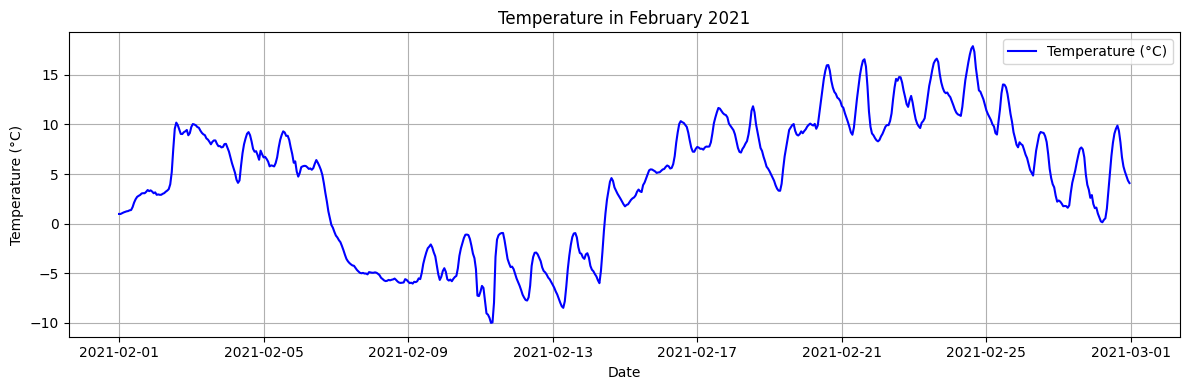

In [58]:
plt.figure(figsize=(12, 4))
plt.plot(feb_2021.index, feb_2021['temp'], label='Temperature (°C)', color='blue')
plt.title("Temperature in February 2021")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

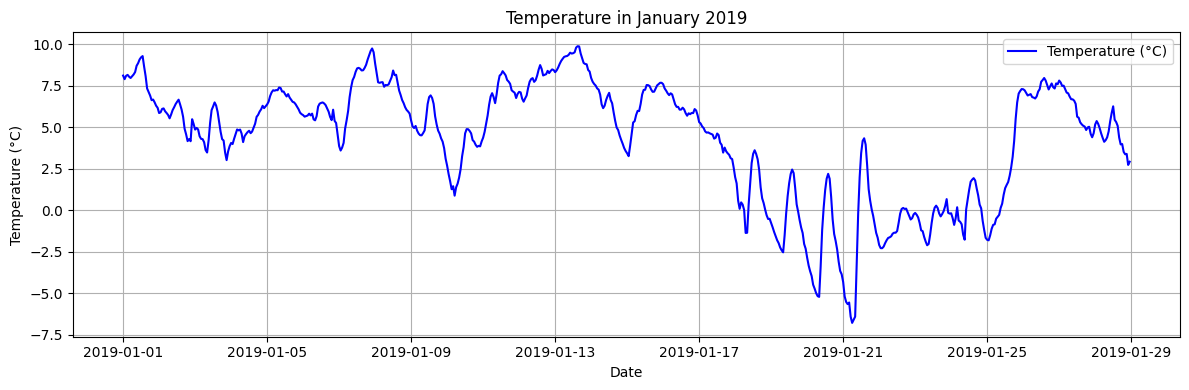

In [44]:
plt.figure(figsize=(12, 4))
plt.plot(jan_2019.index, jan_2019['temp'], label='Temperature (°C)', color='blue')
plt.title("Temperature in January 2019")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

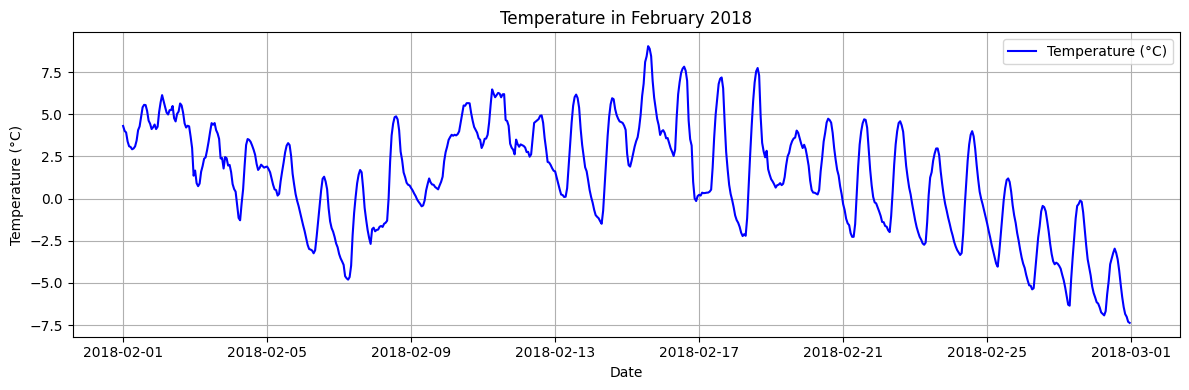

In [45]:
plt.figure(figsize=(12, 4))
plt.plot(feb_2018.index, feb_2018['temp'], label='Temperature (°C)', color='blue')
plt.title("Temperature in February 2018")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

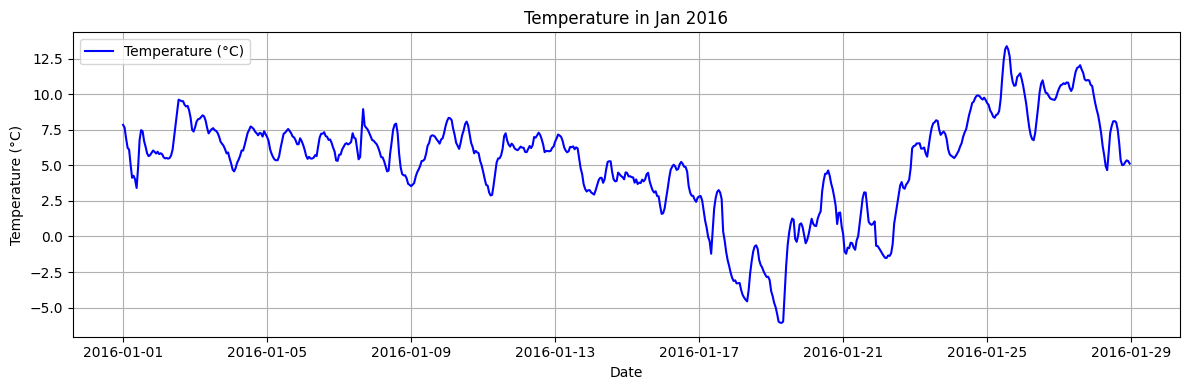

In [46]:
plt.figure(figsize=(12, 4))
plt.plot(jan_2016.index, jan_2016['temp'], label='Temperature (°C)', color='blue')
plt.title("Temperature in Jan 2016")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Hottest days

Find the hottest days in the past 10 years

In [59]:
import xarray as xr

# Load both datasets
summer_10y_temp = xr.open_dataset("emwcf/jul-aug-2015-2024/instant.nc")  # temperatures

# Convert to DataFrame
summer_10y = summer_10y_temp.to_dataframe().reset_index()

# Convert Kelvin to Celsius
summer_10y['temp'] = summer_10y['t2m'] - 273.15
summer_10y['soil_0_7'] = summer_10y['stl1'] - 273.15

In [60]:
summer_10y = summer_10y.rename(columns={"valid_time": "time"})
summer_10y['month'] = pd.to_datetime(summer_10y['time']).dt.month
summer_10y = summer_10y.set_index('time')

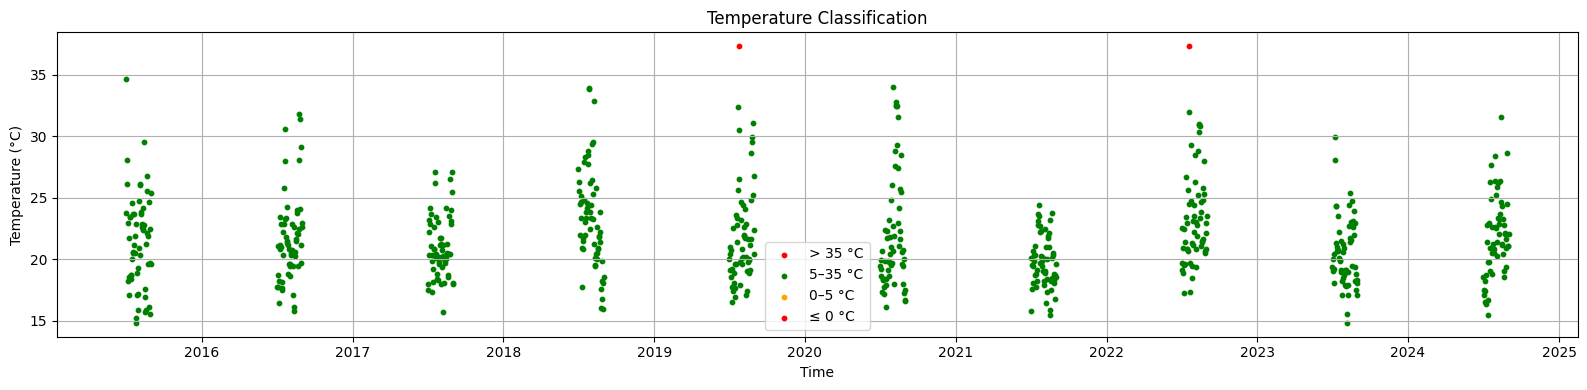

In [61]:
import matplotlib.pyplot as plt

# Define masks for each range
mask_red_hot = summer_10y['temp'] > 35
mask_green = (summer_10y['temp'] > 5) & (summer_10y['temp'] <= 35)
mask_orange = (summer_10y['temp'] > 0) & (summer_10y['temp'] <= 5)
mask_red_cold = summer_10y['temp'] <= 0

plt.figure(figsize=(16, 4))

# Plot each range with corresponding color
plt.scatter(summer_10y.index[mask_red_hot], summer_10y['temp'][mask_red_hot], color='red', label='> 35 °C', s=10)
plt.scatter(summer_10y.index[mask_green], summer_10y['temp'][mask_green], color='green', label='5–35 °C', s=10)
plt.scatter(summer_10y.index[mask_orange], summer_10y['temp'][mask_orange], color='orange', label='0–5 °C', s=10)
plt.scatter(summer_10y.index[mask_red_cold], summer_10y['temp'][mask_red_cold], color='red', label='≤ 0 °C', s=10)

plt.title("Temperature Classification")
plt.ylabel("Temperature (°C)")
plt.xlabel("Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [63]:
# Ensure the index is datetime
summer_10y.index = pd.to_datetime(summer_10y.index)

# Step 1: Group by date and get daily maximum temperature
daily_max_temps = summer_10y['temp'].groupby(summer_10y.index.date).max()

# Step 2: Sort by temperature (descending) and select the 20 hottest days
hottest_20_days = daily_max_temps.sort_values(ascending=False).head(10)

# Display the result
print(hottest_20_days)

2019-07-25    37.318024
2022-07-19    37.295074
2015-07-01    34.626373
2020-07-31    33.978424
2018-07-26    33.940338
2018-07-27    33.820221
2018-08-07    32.880035
2020-08-09    32.775787
2020-08-08    32.537262
2020-08-10    32.468658
Name: temp, dtype: float32
